# REPRESENTACIÓN DE TEXTO Y RECUPERACIÓN DE TEXTO

En primer lugar importamos algunas bibliotecas útiles y descargamos algunos corpus y paquetes populares de nltk.

In [1]:
import nltk
import string
import math
import numpy
import matplotlib

nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/sergio/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/sergio/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/sergio/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/sergio/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/sergio/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/sergio/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to

True



# Ejemplo 1

Obtener una lista de palabras clave a partir de un texto.

Usaremos el siguiente texto:

*The Chinese province at the center of the novel coronavirus outbreak reported a record spike in deaths Thursday, bringing the total number to more than 1300 people globally, as experts warned the epidemic could create havoc in less prepared countries.*



In [2]:

sentence = "Iran has moved to stop UN inspections of its nuclear sites and step up uranium enrichment under a new law approved by its parliament."


Separamos el texto en tokens y los representamos en minúscula.

In [3]:
tokens_lowercase = [word.lower() for word in nltk.word_tokenize(sentence)]

Seleccionamos una lista de "stopwords" y un "stemmer.

In [4]:
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()

Tomamos la lista de tokens y eliminamos los símbolos de puntación, las stopwords y transformamos a cada token en su correpondiente stem. El resultado es una lista de términos.

In [5]:
terms =[]
for token in tokens_lowercase:
    # Process each token
    if token not in string.punctuation:
        if token not in stopwords:
            token = stemmer.stem(token)
            terms.append(token)
terms

['iran',
 'move',
 'stop',
 'un',
 'inspect',
 'nuclear',
 'site',
 'step',
 'uranium',
 'enrich',
 'new',
 'law',
 'approv',
 'parliament']

---
# Ejemplo 2

Gener una representación vectorial de un pequeño corpus.

Creamos un corpus de juguete.



In [6]:
d1 = "El río Danubio pasa por Viena, su color es azul."
d2 = "El caudal de un río asciende en Invierno."
d3 = "El río Rhin y el río Danubio tienen mucho caudal."
d4 = "Si un río es navegable, es porque tiene mucho caudal." 

raw_corpus = [d1,d2,d3,d4]

Identificamos el conjunto de términos (palabras clave) del corpus y tranformamos a cada documento en una lista de términos. En este caso optamos por eliminar stopwords (en español) pero no aplicaremos stemming.

In [7]:
stopwords_spanish = nltk.corpus.stopwords.words('spanish')
term_set = set ()
corpus =[]
for raw_document in raw_corpus:
    tokens_lowercase = [word.lower() for word in nltk.word_tokenize(raw_document)]
    terms =[]
    for token in tokens_lowercase:
        if token not in string.punctuation:
            if token not in stopwords_spanish:
                terms.append(token)
                term_set.add(token)        
    corpus.append(terms)
    
num_documents = len(corpus)  
num_terms = len(term_set)   

Creamos un mapeo de términos a números (ids).

In [8]:
term_to_id = {}
id = 0
for term in term_set:
    term_to_id[term] = id
    id += 1

Creamos una matriz TF.

In [9]:
tf_matrix = numpy.zeros((num_documents, num_terms))
document_id = 0

for document in corpus:
    for term in set(document):
        term_id = term_to_id[term]
        tf_matrix[document_id][term_id] = float(document.count(term))
    document_id += 1


Creamos un vector IDF.

In [10]:
idf_vector = numpy.zeros(num_terms)
for term in term_set:
    term_document_frequency = 0
    for document in corpus:
        if term in document:
            term_document_frequency += 1
    
    idf_vector[term_to_id[term]] = math.log(float(num_documents) / float(term_document_frequency),10)

Creamos la matriz TF-IDF.

Producto de la matriz de frecuencia por el vector idf

In [11]:
tfidf_matrix = numpy.multiply(tf_matrix,idf_vector)

Normalizamos la matrtiz TF-IDF.

Es para que los documentos muy grandes, no tengan 
valores muy altos.

In [12]:
normalized_tfidf_matrix = numpy.zeros((num_documents, num_terms))
document_id = 0
for document in tfidf_matrix:
    document_norm = numpy.linalg.norm(document)
    normalized_tfidf_matrix[document_id] = [w/document_norm for w in document]
    document_id += 1

Mostramos resultados.

In [13]:
print(term_to_id)
numpy.set_printoptions(precision=3)
print('TF')
print(tf_matrix)
print('IDF')
print(idf_vector)
print('TF_IDF')
print(tfidf_matrix)
print('TF_IDF NORMALIZADA')
print(normalized_tfidf_matrix)

{'río': 0, 'asciende': 1, 'viena': 2, 'danubio': 3, 'invierno': 4, 'color': 5, 'rhin': 6, 'azul': 7, 'navegable': 8, 'caudal': 9, 'pasa': 10, 'si': 11}
TF
[[1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [2. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.]]
IDF
[0.    0.602 0.602 0.301 0.602 0.602 0.602 0.602 0.602 0.125 0.602 0.602]
TF_IDF
[[0.    0.    0.602 0.301 0.    0.602 0.    0.602 0.    0.    0.602 0.   ]
 [0.    0.602 0.    0.    0.602 0.    0.    0.    0.    0.125 0.    0.   ]
 [0.    0.    0.    0.301 0.    0.    0.602 0.    0.    0.125 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.602 0.125 0.    0.602]]
TF_IDF NORMALIZADA
[[0.    0.    0.485 0.243 0.    0.485 0.    0.485 0.    0.    0.485 0.   ]
 [0.    0.7   0.    0.    0.7   0.    0.    0.    0.    0.145 0.    0.   ]
 [0.    0.    0.    0.44  0.    0.    0.879 0.    0.    0.182 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.7   0.

---
# Ejemplo 3
Generamos una matriz TF-IDF a partir del corpus "Inaugural" provisto por nltk.



Identificamos el conjunto de términos (palabras clave) del corpus y transformamos a cada documento en una lista de términos.

In [14]:
corpus = []
term_set = set ()
filenames = []
filename_to_id ={}

id = 0
for filename in nltk.corpus.inaugural.fileids():
    filenames.append(filename)
    filename_to_id[filename] = id
    raw_document = nltk.corpus.inaugural.raw(filename)
    tokens_lowercase = [word.lower() for word in nltk.word_tokenize(raw_document)]
    terms =[]
    for token in tokens_lowercase:
        # Process each token
        if token not in string.punctuation:
            if token not in stopwords:
                token = stemmer.stem(token)
                terms.append(token)
                term_set.add(token)        
    corpus.append(terms)
    id += 1  
num_documents = len(corpus)  
num_terms = len(term_set)   

Creamos un mapeo de términos a números (ids).

In [15]:
term_to_id = {}
id = 0
for term in term_set:
  term_to_id[term] = id
  id += 1

Creamos una matriz TF.

In [16]:
tf_matrix = numpy.zeros((num_documents, num_terms))
document_id = 0

for document in corpus:
  for term in set(document):
    term_id = term_to_id[term]
    tf_matrix[document_id][term_id] = float(document.count(term))
  document_id += 1


Creamos un vector IDF.

In [17]:
idf_vector = numpy.zeros(num_terms)
for term in term_set:
  term_document_frequency = 0
  for document in corpus:
    if term in document:
      term_document_frequency += 1
  idf_vector[term_to_id[term]] = math.log(float(num_documents) / float(term_document_frequency),10)

Creamos la matriz TF-IDF.

In [18]:
tfidf_matrix = numpy.multiply(tf_matrix,idf_vector)

Normalizamos la matrtiz TF-IDF.

In [19]:
normalized_tfidf_matrix = numpy.zeros((num_documents, num_terms))
document_id = 0
for document in tfidf_matrix:
  document_norm = numpy.linalg.norm(document)
  normalized_tfidf_matrix[document_id] = [w/document_norm for w in document]
  document_id += 1

In [20]:
normalized_tfidf_matrix.shape

(58, 5574)

In [21]:
normalized_tfidf_matrix

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.05 , 0.   , 0.   , ..., 0.036, 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.04 , 0.   , 0.   ],
       [0.045, 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

---
#Ejemplo 4

Determinar qué tan similares son los discursos inagurales de cada presidente de EEUU al de Donald Trump.

A partir de la matriz TF-IDF normalizada calculamos la similitud por coseno de cada documento con el documento que representa al discurso de Donald Trump.

In [22]:

target_document =  normalized_tfidf_matrix[filename_to_id['2017-Trump.txt']]
similarities = numpy.zeros(num_documents)
document_id = 0
for document in normalized_tfidf_matrix:
  similarities[document_id] = numpy.dot(document,target_document)
  document_id += 1

Mostramos un gráfico de barras horizontales representando las similitudes calculadas.

<BarContainer object of 58 artists>

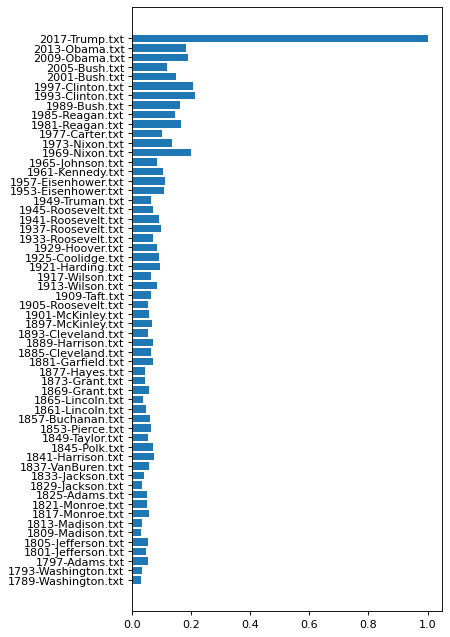

In [23]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(5, 10), dpi=80, facecolor='w', edgecolor='k')
y_pos = numpy.arange(len(filenames))
matplotlib.pyplot.barh(y_pos,similarities,tick_label=filenames)